In [1]:
import numpy as np
import pandas as pd
from deepneuralnet import *
import deepneuralnet_train as dnntrain

In [2]:
# Set up hyper parameters 
classes = 2
layer_dims = [10, classes] 
learning_rate = 0.01
keep_prob = 0.8
num_epochs = 1000
minibatch_size = 64
print_summary = False
isBinary = classes == 2 
hyperparams = DNN.create_hyperparameter_bundle(layer_dims, learning_rate, num_epochs, keep_prob, minibatch_size)
print(hyperparams)

{'layer_dims': [10, 2], 'keep_prob': 0.8, 'learning_rate': 0.01, 'num_epochs': 1000, 'minibatch_size': 64, 'momentum': 0.95}


In [3]:
# Generate data
m = 1000
n_x = 100
label = 'Survived'
x_data = np.random.rand(m, n_x).astype('float32')
y_test = None

if isBinary:
    y_test = np.random.randint(2, size=(1, m)).astype('float32')[0]
else:
    y_test = np.random.randint(classes, size=(1, m)).astype('float32')[0]

df = pd.DataFrame(x_data)
df[label] = y_test
classification = len(set(y_test))
print(classification)

2


train_x.shape: (700, 100)
train_y.shape: (700, 2)
dev_x.shape: (300, 100)
dev_y.shape: (300, 2)
Binary classification neural network with hyperparameters:
layer_dims: [10, 2] dropoutKeepProb: 0.8 learning_rate: 0.01 num_epochs: 1000 minibatch_size: 64
Training underway...
Cost after epoch 0: 0.794770
Cost after epoch 20: 0.675276
Cost after epoch 40: 0.607451
Cost after epoch 60: 0.578796
Cost after epoch 80: 0.595791
Cost after epoch 100: 0.567641
Cost after epoch 120: 0.561634
Cost after epoch 140: 0.546696
Cost after epoch 160: 0.577563
Cost after epoch 180: 0.543302
Cost after epoch 200: 0.544283
Cost after epoch 220: 0.529673
Cost after epoch 240: 0.555233
Cost after epoch 260: 0.528762
Cost after epoch 280: 0.544545
Cost after epoch 300: 0.548325
Cost after epoch 320: 0.538354
Cost after epoch 340: 0.552950
Cost after epoch 360: 0.522694
Cost after epoch 380: 0.536613
Cost after epoch 400: 0.538785
Cost after epoch 420: 0.536233
Cost after epoch 440: 0.563168
Cost after epoch 460

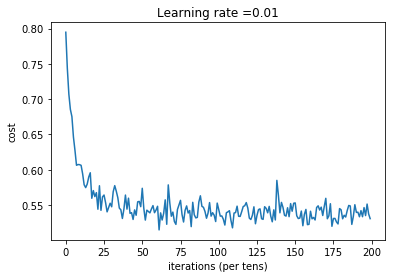

train_accuracy_percent : 68.4285700321
test_accuracy_percent : 54.6666681767
precision_percent : 54.6666666667
recall_percent : 54.6666666667
f1score : 54.6666666667
Done training!



In [4]:
# Example of using dnn.train_with_hyperparameter_bundle
nn = DNN(hyperparams)
model = nn.split_data_and_train(df, label, split_percent=0.7)
parameters = model[DNN.KEY_PARAMETERS]

In [5]:
predictions = DNN.predict(x_data, parameters)